# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Data Preparing

## Train and Test data 

In [2]:
train_df = pd.read_csv('./processed_data/trainset.csv')
test_df = pd.read_csv('./processed_data/testset.csv')
n_feature = train_df.shape[1]
n_feature

40

## Data Setup

In [3]:
# train_X = train_df
# train_y = train_df['Temperature (C)']
# val_X = test_df
# val_y = test_df['Temperature (C)']
# train_X.drop(train_X.index[-1], inplace=True)
# train_y = train_y.drop(train_y.index[0])
# val_X.drop(val_X.index[-1], inplace=True)
# val_y = val_y.drop(val_y.index[0])

train_X = train_df
val_X = test_df
print(val_X.columns)
date_time = pd.to_datetime(test_df.pop('Formatted Date'), format='%Y-%m-%d %H:%M:%S.%f %z')
print(val_X.columns)

train_X.drop(['Formatted Date'],axis=1,inplace=True)
feature_name = []

# prepare train_y and val_y for each feature
train_y = []
for column_name in train_df:
   column_data = train_df[column_name]
   feature_name.append(column_name)
   train_y.append(column_data.values)
val_y = []
for column_name in test_df:
   column_data = test_df[column_name]
   val_y.append(column_data.values)

Index(['Formatted Date', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Visibility (km)',
       'Pressure (millibars)', 'Summary_Breezy', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Wx',
       'Wy', 'Day sin', 'Day

In [4]:
print(len(feature_name))
print(len(train_y))

39
39


In [5]:
train_X.drop(train_X.index[-1], inplace=True)
val_X.drop(val_X.index[-1], inplace=True)
ft_len = len(feature_name)
for i in range(0, ft_len):
   train_y[i] = train_y[i][1:]
   val_y[i] = val_y[i][1:]

# Build Models

In [6]:
models = []

# Train

In [7]:
for i in range(0, ft_len):
   models.append(DecisionTreeRegressor())

In [8]:
for i in range(0, ft_len):
   model = models[i]
   model.fit(train_X, train_y[i])

# Evaluate

In [9]:
from sklearn.metrics import mean_absolute_error

## Some important features

In [10]:
features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)']

## Evaluate them

Độ lệch trung bình của Temperature (C) là: 0.962
Biểu đồ:


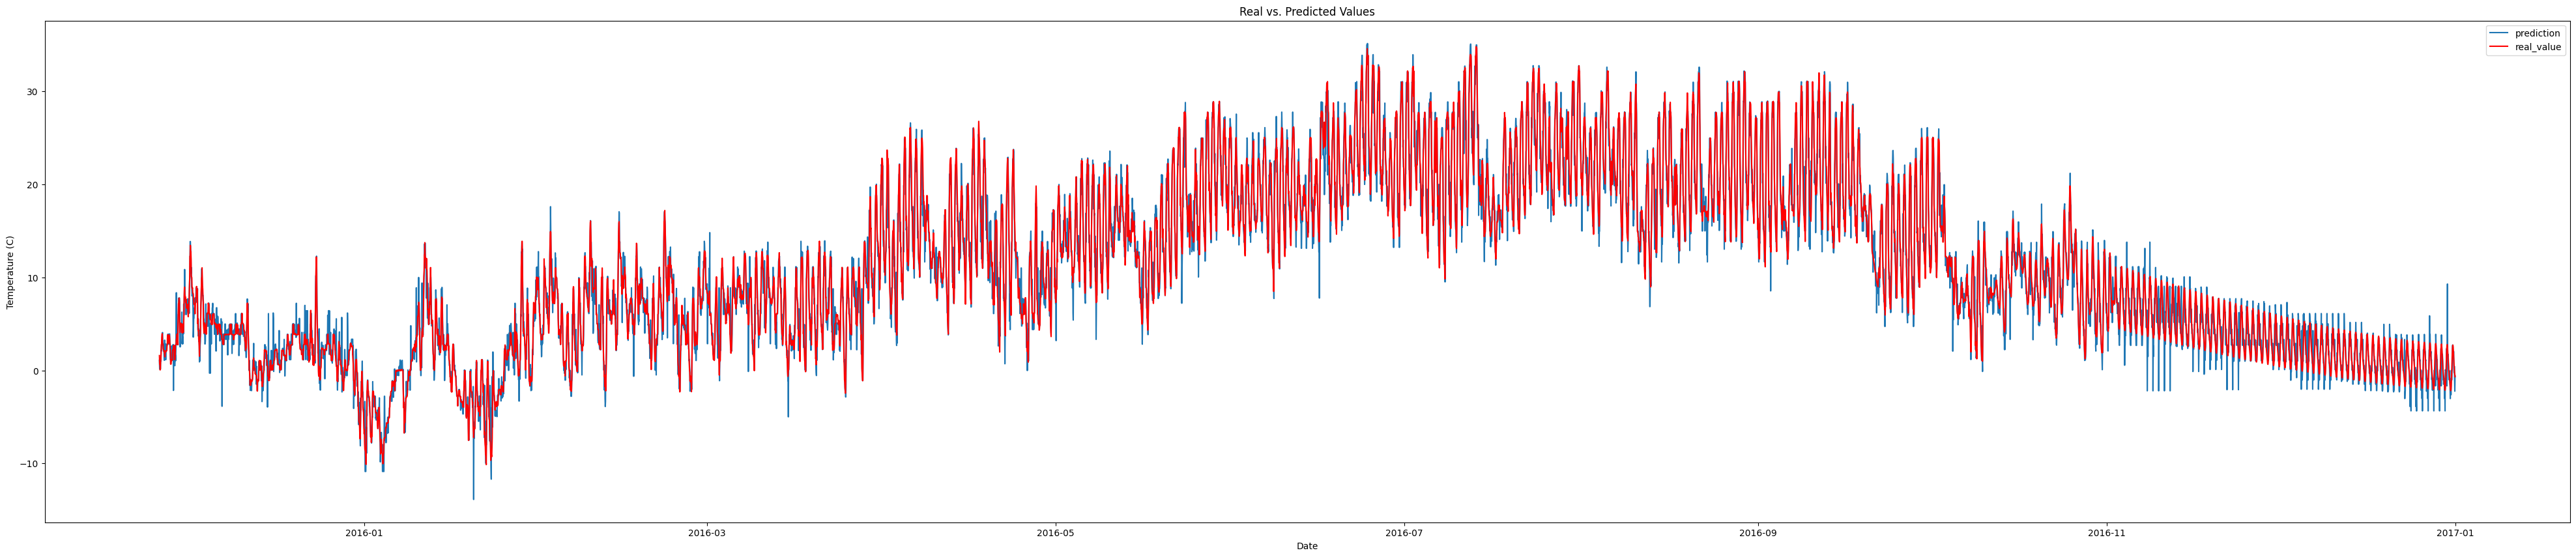

Độ lệch trung bình của Apparent Temperature (C) là: 1.236
Biểu đồ:


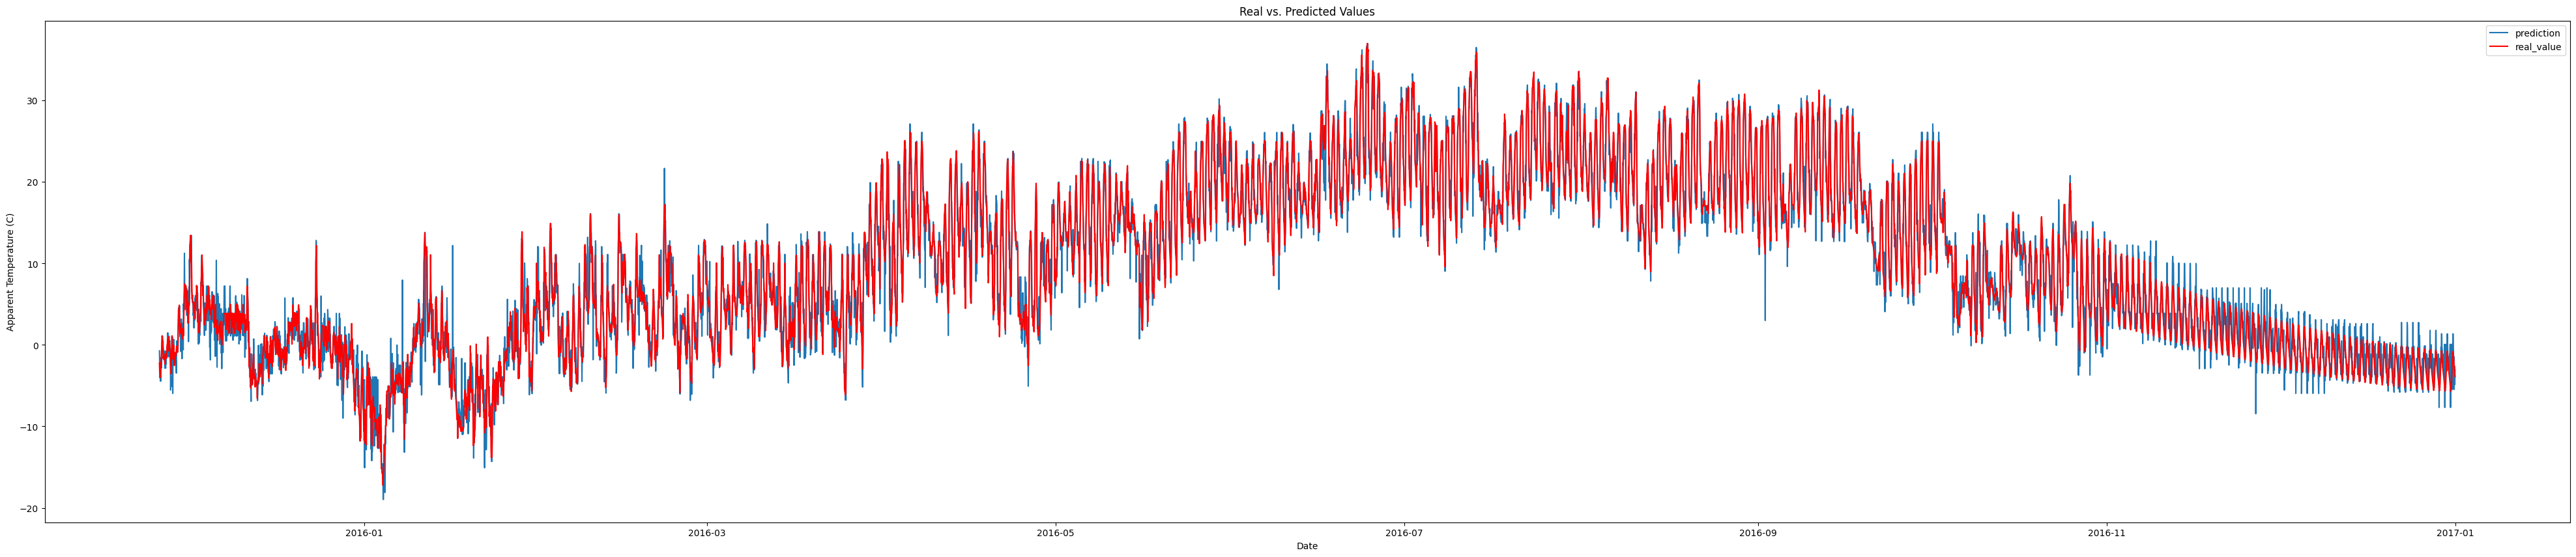

Độ lệch trung bình của Humidity là: 0.051
Biểu đồ:


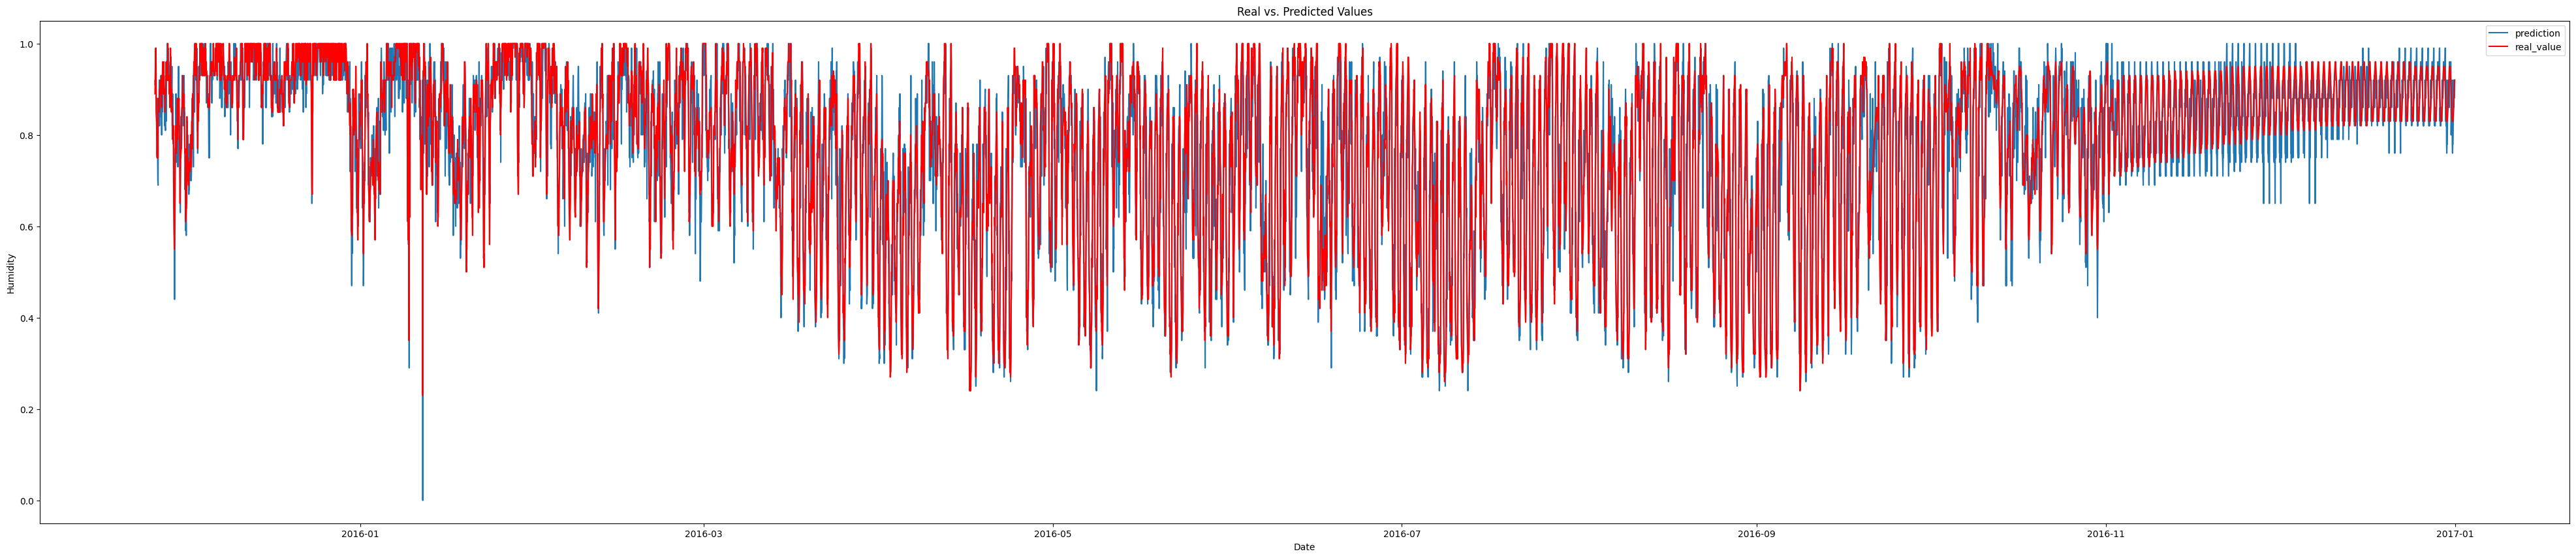

Độ lệch trung bình của Visibility (km) là: 2.146
Biểu đồ:


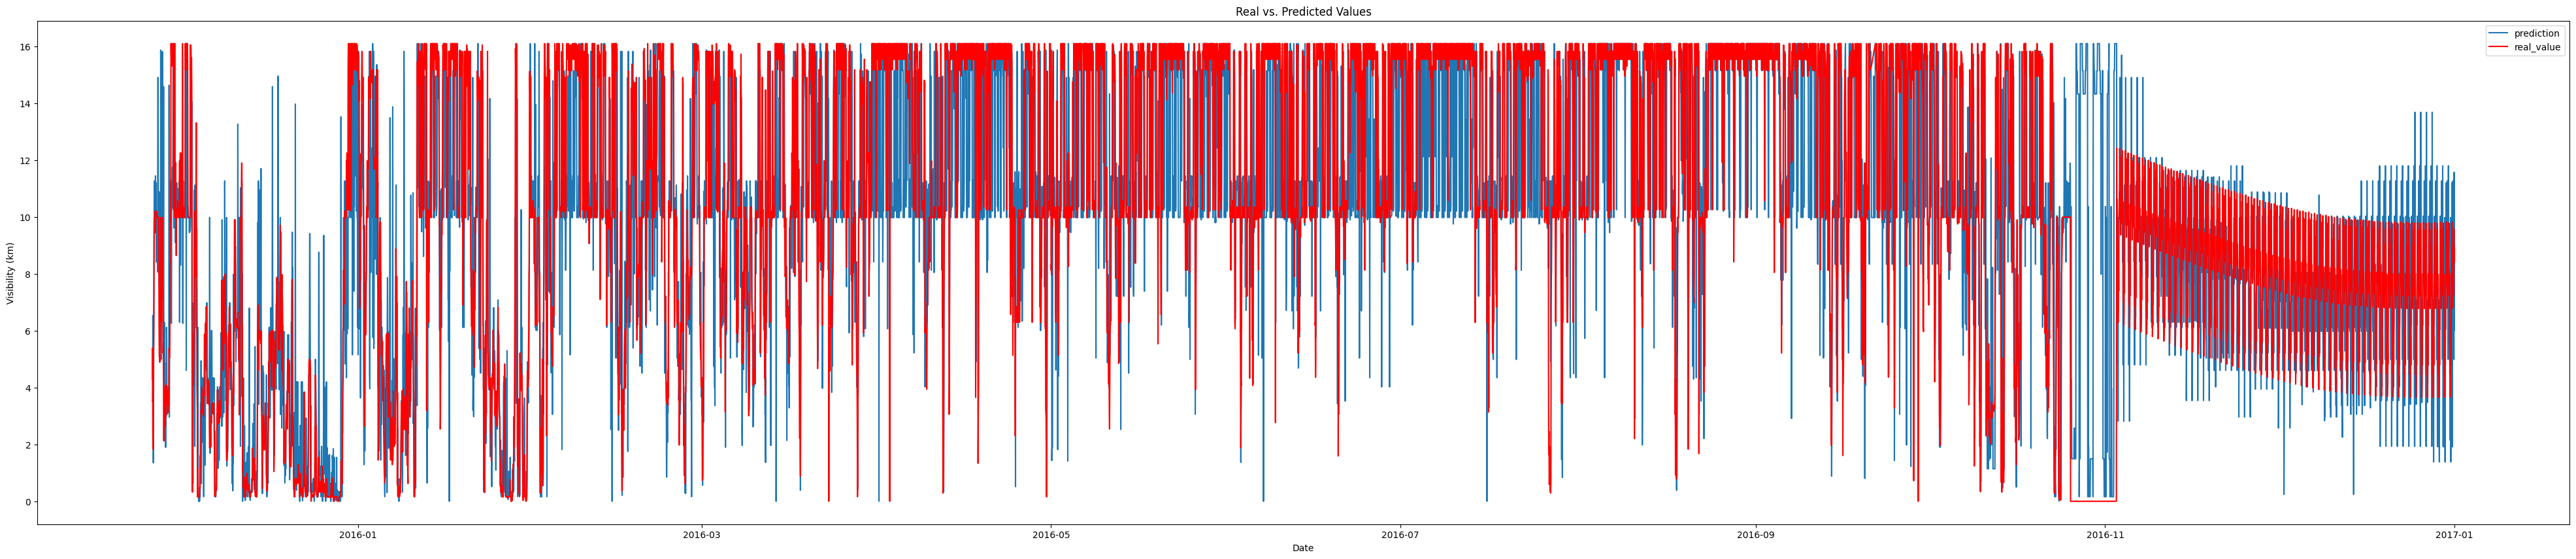

Độ lệch trung bình của Pressure (millibars) là: 0.868
Biểu đồ:


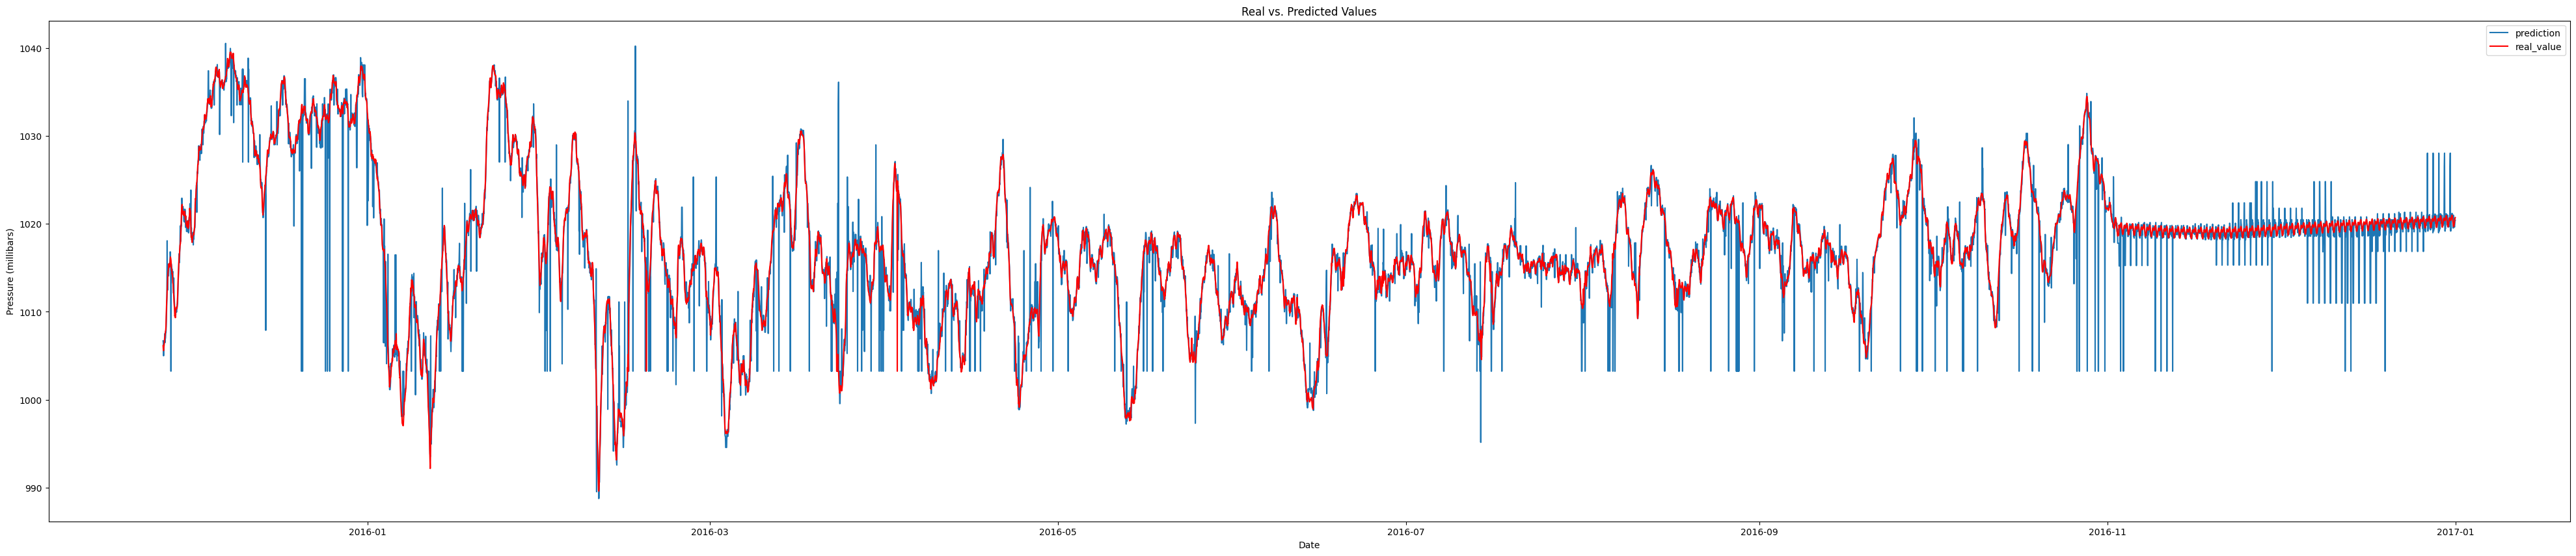

In [12]:
for i in range(0, ft_len):
   ft_name = feature_name[i]
   if ft_name in features:
      predict = models[i].predict(val_X)
      mean = float(mean_absolute_error(val_y[i], predict))
      print(f'Độ lệch trung bình của {ft_name} là: {mean:.3f}')
      print('Biểu đồ:')
      plt.figure(figsize=(50,10))
      plt.plot(date_time[1:], predict, label='prediction')     
      plt.plot(date_time[1:], val_y[i], c='red', label='real_value') 
      plt.xlabel('Date')
      plt.ylabel(ft_name)
      plt.title('Real vs. Predicted Values')
      plt.legend()
      plt.show()

In [ ]:
# mean absolute error
predict_temp = model.predict(val_X)
mean = float(mean_absolute_error(val_y, predict_temp))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 0.955
